In [457]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# DATASET

In [458]:
df = pd.read_csv('../dataset/tip.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Observations:

- We observe higher total_bill have higher tips.
- Men pay higher tips as compared to women.
- Smokers and non-smokers both pay approximately pay approx. same number of tips
- They receive more tips at dinner time.

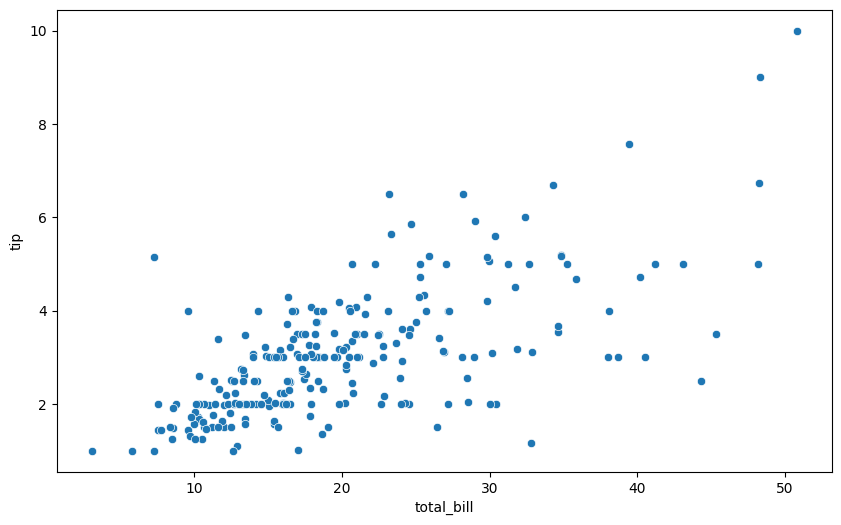

In [ ]:
target_feature = 'tip'

df_target = df[target_feature]
df_data = df.drop(columns=target_feature)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_data, x='total_bill', y=df_target)
plt.show()

<Figure size 1000x600 with 0 Axes>

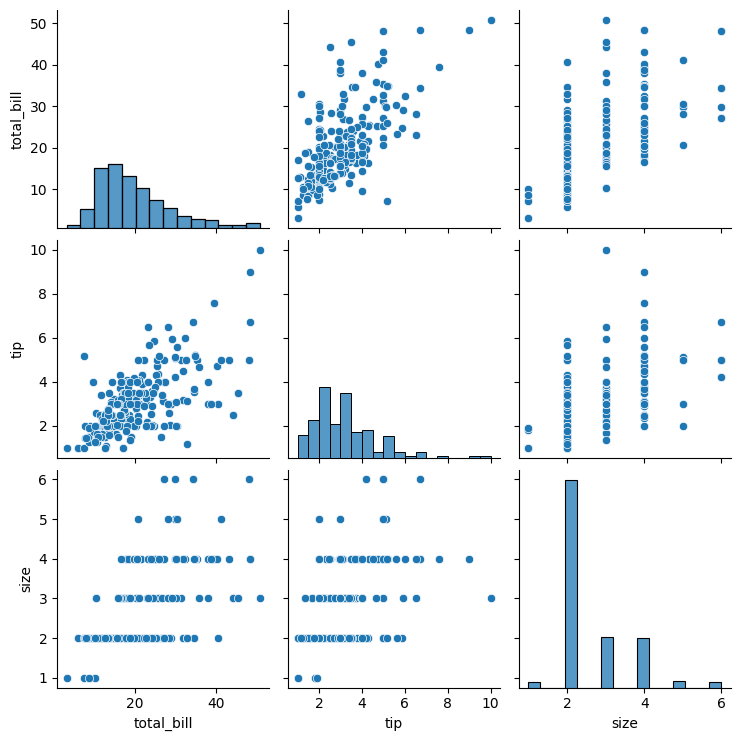

In [460]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

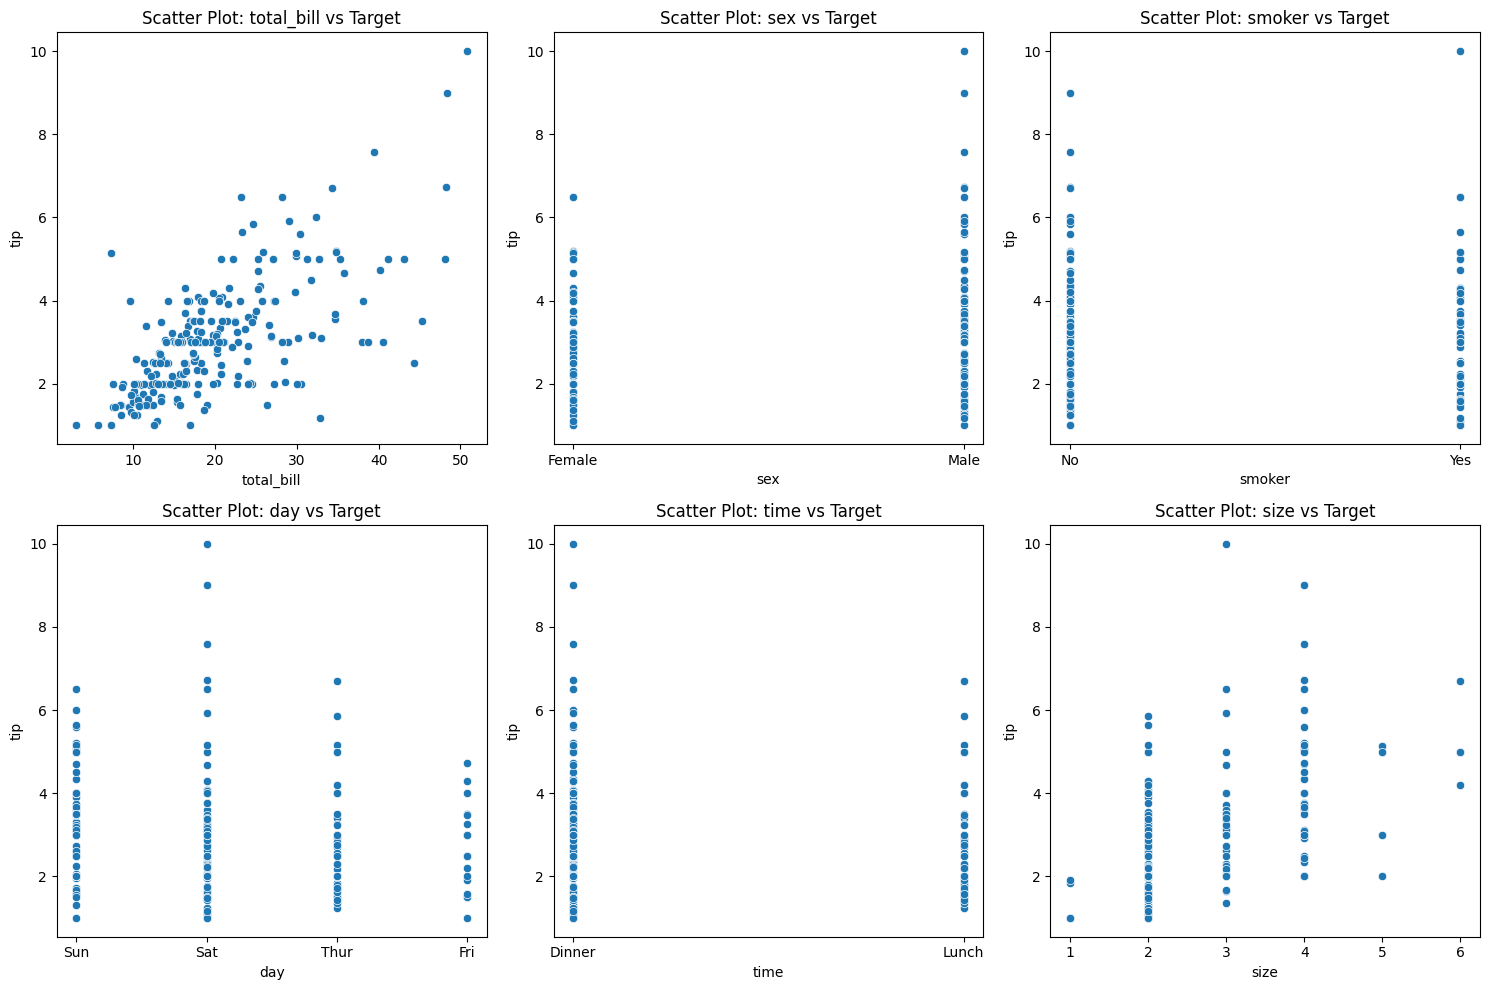

In [461]:
#grid size
num_rows, num_columns = 2, 3

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
axes = axes.ravel()  

for i in range(df_data.shape[1]):
    sns.scatterplot(data=df_data, x=df_data.columns[i], y=df_target, ax=axes[i])
    axes[i].set_title(f"Scatter Plot: {df_data.columns[i]} vs Target")

plt.tight_layout()
plt.show()

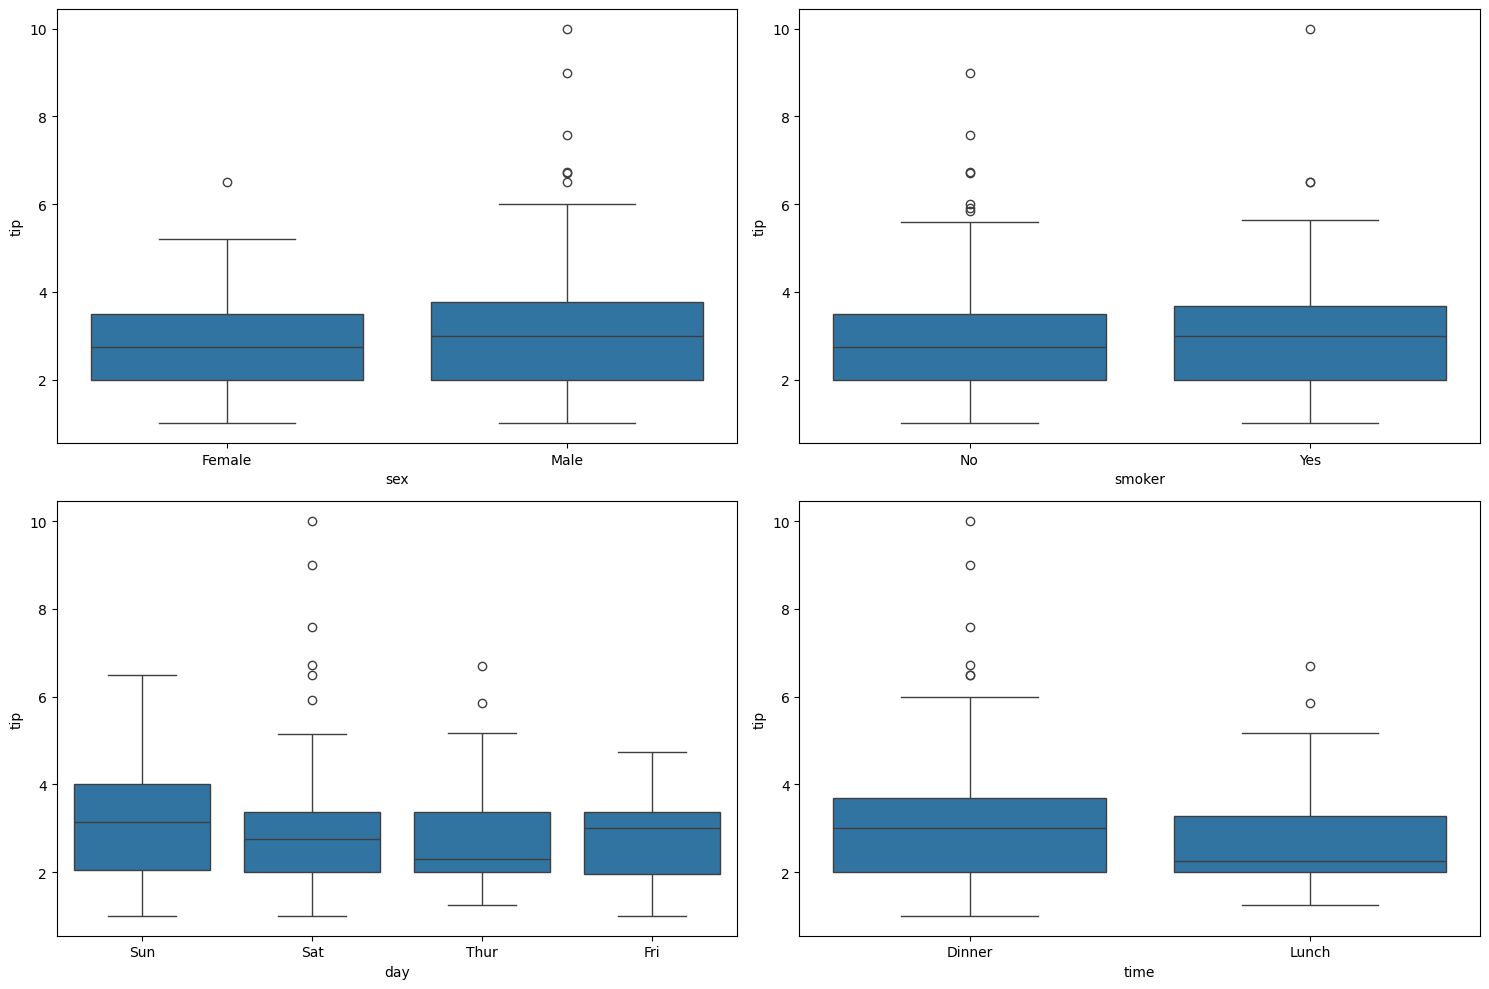

In [462]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x= df_data.sex, y=df_target, ax=axes[0, 0])
sns.boxplot(x=df_data.smoker, y=df_target, ax=axes[0, 1])
sns.boxplot(x=df_data.day, y=df_target, ax=axes[1, 0])
sns.boxplot(x=df_data.time, y=df_target, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Heatmap for relation between columns:

- Relation is found between tip and Size

<Axes: >

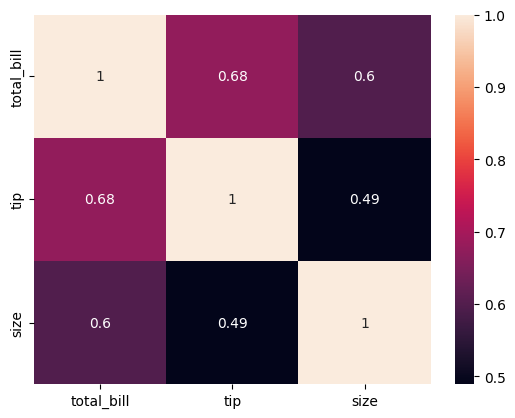

In [463]:
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr, annot=True)

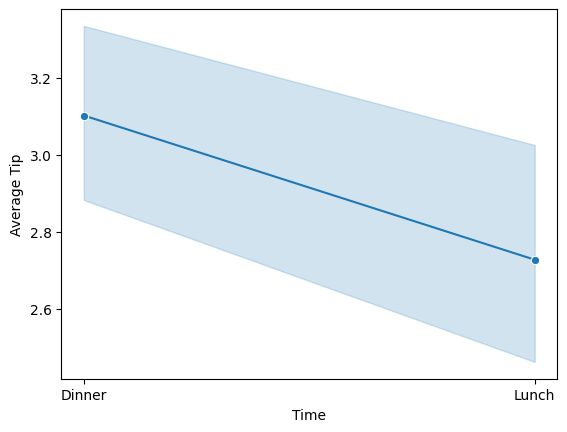

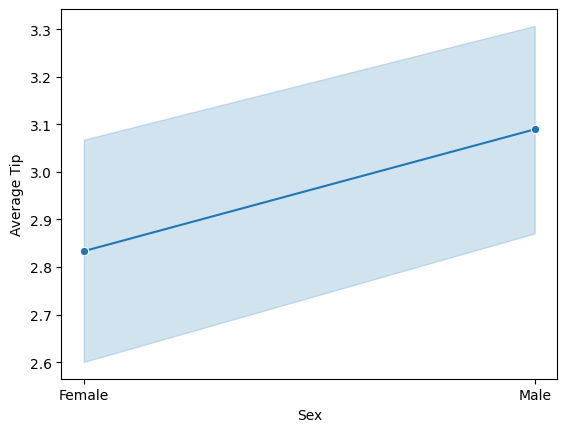

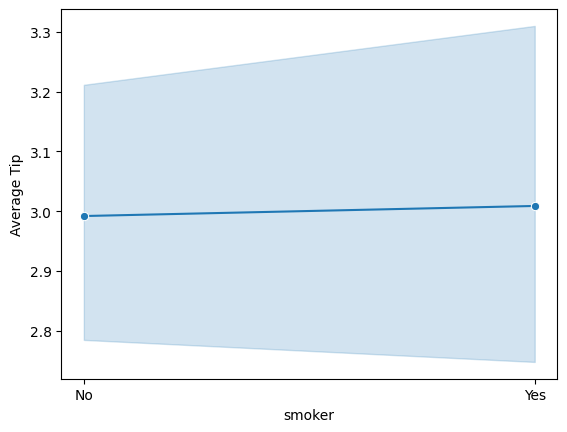

In [464]:
sns.lineplot(x=df['time'], y=df_target, estimator="mean", marker='o')
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

sns.lineplot(x=df['sex'], y=df_target, estimator="mean", marker='o')
plt.xlabel("Sex")
plt.ylabel("Average Tip")
plt.show()

sns.lineplot(x=df['smoker'], y=df_target, estimator="mean", marker='o')
plt.xlabel("smoker")
plt.ylabel("Average Tip")
plt.show()

In [465]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['time'] = label_encoder.fit_transform(df['time'])

In [466]:
import statsmodels.api as sm

X = df_data
X = sm.add_constant(X)
y = df_target

model = sm.OLS(y, X).fit()

In [467]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print("Rainbow Test Statistic:", test_stat)
print("P-value:", p_value)

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


Since the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between the independent variables and the dependent variable.

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [469]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = df.drop(columns='tip')
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,0.703357,0.437302
Ridge Regression,0.703075,0.437527
Lasso Regression,0.590853,0.527307
Decision Tree,1.255194,-0.004178
Random Forest,0.919672,0.264246
SVR,0.652453,0.478025
KNN,0.876373,0.298886


LASSO REGRESSION has the least mean square error and highest r2 vlaue

In [470]:
models['Lasso Regression'].fit(X_train, y_train)
feature_importance = pd.Series(models['Lasso Regression'].coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant factor:", significant_features)

Significant factor: size          0.108081
total_bill    0.099099
dtype: float64


In [ ]:
from scipy import stats

def evaluate_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

    residuals = y_test - y_pred

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    print(f"Mean of Residuals: {np.mean(residuals):.4f}")
    print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")
    print(f"Skewness of Residuals: {stats.skew(residuals):.4f}")

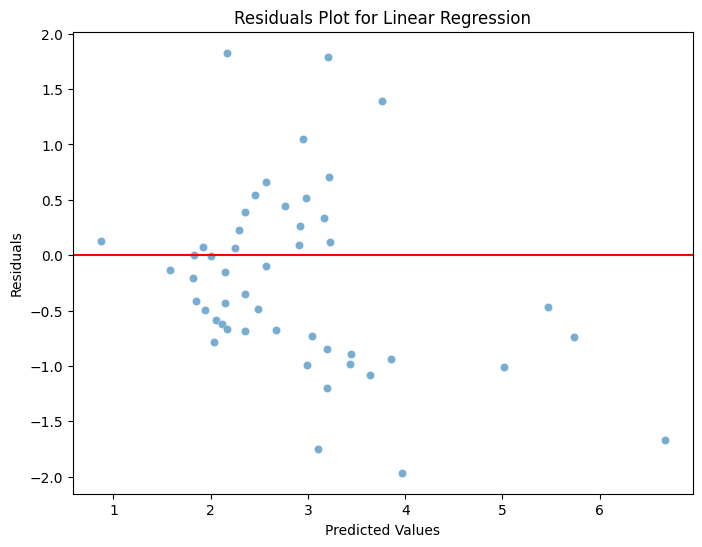


Linear Regression Results:
RMSE: 0.8387
R2 Score: 0.4373
Mean of Residuals: -0.2330
Standard Deviation of Residuals: 0.8056
Skewness of Residuals: 0.4245


In [472]:
y_pred_lr = models['Linear Regression'].predict(X_test)

evaluate_residuals(y_test, y_pred_lr, "Linear Regression")

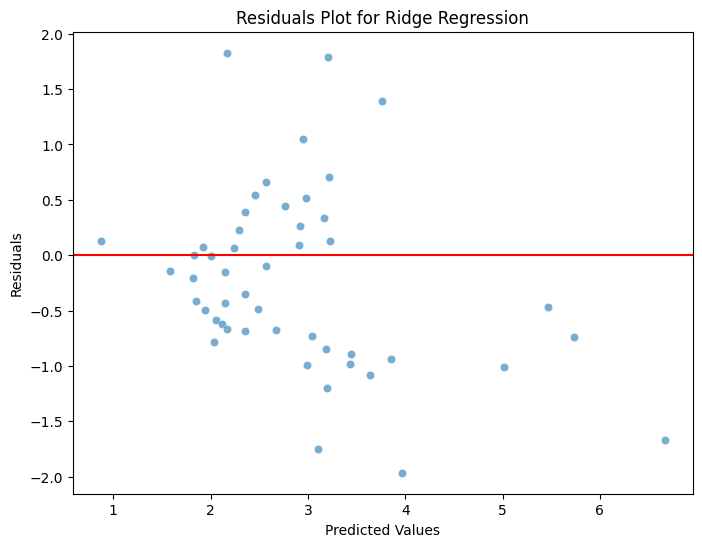


Ridge Regression Results:
RMSE: 0.8385
R2 Score: 0.4375
Mean of Residuals: -0.2332
Standard Deviation of Residuals: 0.8054
Skewness of Residuals: 0.4247


In [473]:
y_pred_ridge = models['Ridge Regression'].predict(X_test)
evaluate_residuals(y_test, y_pred_ridge, "Ridge Regression")

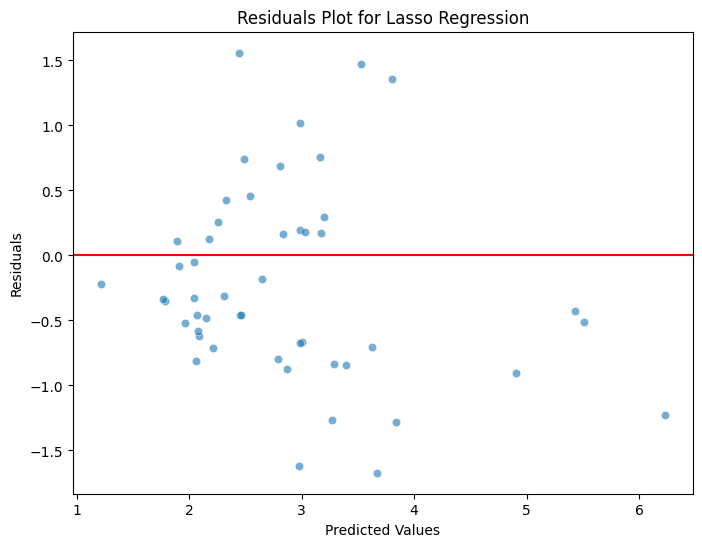


Lasso Regression Results:
RMSE: 0.7687
R2 Score: 0.5273
Mean of Residuals: -0.2302
Standard Deviation of Residuals: 0.7334
Skewness of Residuals: 0.4941


In [474]:
y_pred_lasso = models['Lasso Regression'].predict(X_test)
evaluate_residuals(y_test, y_pred_lasso, "Lasso Regression")


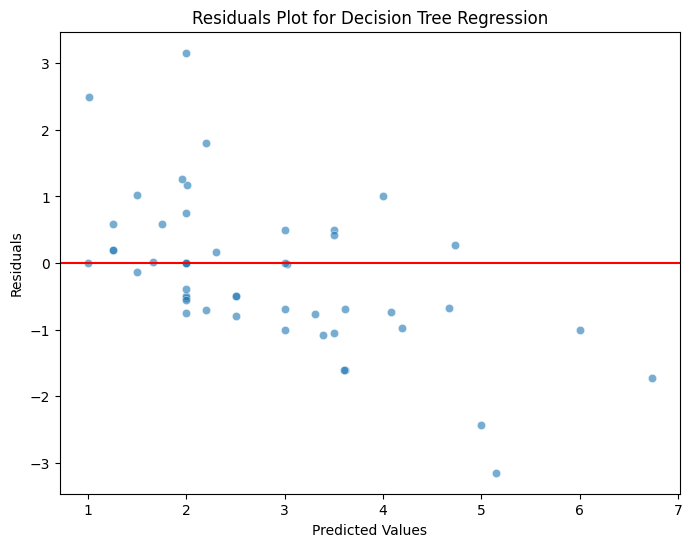


Decision Tree Regression Results:
RMSE: 1.1204
R2 Score: -0.0042
Mean of Residuals: -0.1729
Standard Deviation of Residuals: 1.1069
Skewness of Residuals: 0.3418


In [475]:
y_pred_tree = models['Decision Tree'].predict(X_test)
evaluate_residuals(y_test, y_pred_tree, "Decision Tree Regression")

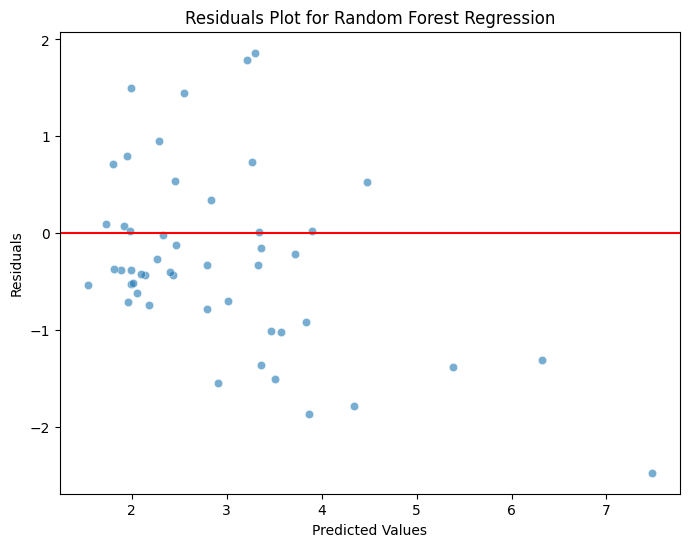


Random Forest Regression Results:
RMSE: 0.9590
R2 Score: 0.2642
Mean of Residuals: -0.2895
Standard Deviation of Residuals: 0.9143
Skewness of Residuals: 0.2710


In [476]:
y_pred_forest = models['Random Forest'].predict(X_test)
evaluate_residuals(y_test, y_pred_forest, "Random Forest Regression")

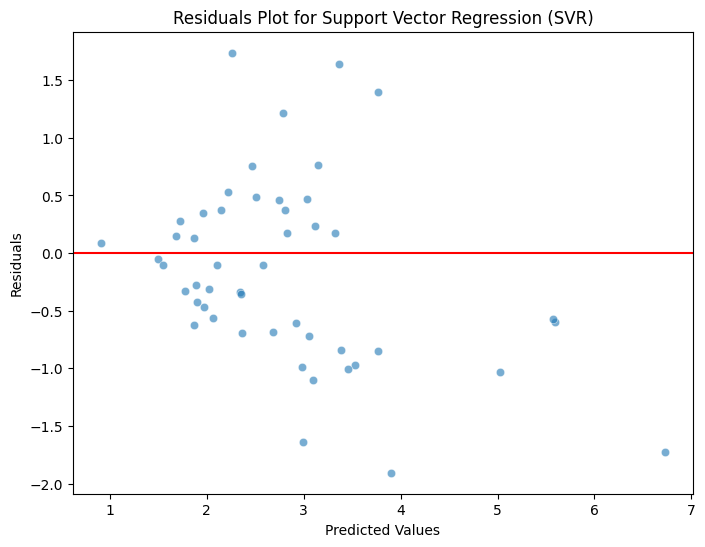


Support Vector Regression (SVR) Results:
RMSE: 0.8077
R2 Score: 0.4780
Mean of Residuals: -0.1668
Standard Deviation of Residuals: 0.7903
Skewness of Residuals: 0.2436


In [477]:
y_pred_svr = models['SVR'].predict(X_test)
evaluate_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

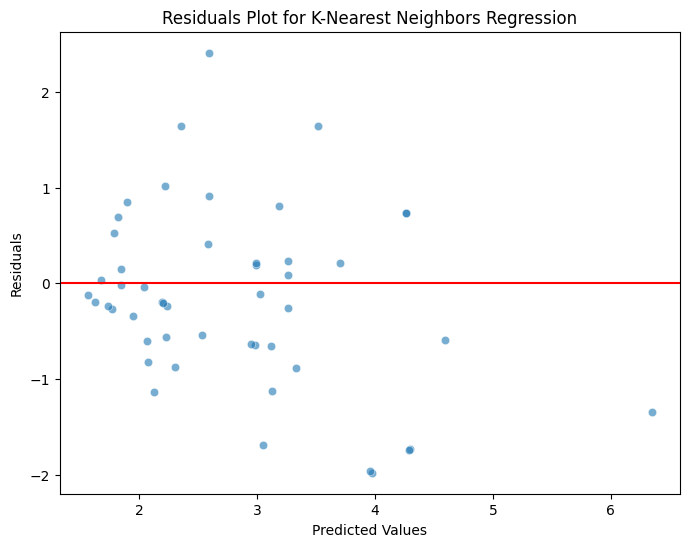


K-Nearest Neighbors Regression Results:
RMSE: 0.9361
R2 Score: 0.2989
Mean of Residuals: -0.1673
Standard Deviation of Residuals: 0.9211
Skewness of Residuals: 0.2298


In [478]:
y_pred_knn = models['KNN'].predict(X_test)
evaluate_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

# RESULT:

- LASSO performs better than the other models.
- Most significant factor is SIZE (calculated above).

# Suggestions:

- Management should focus on total bill of their customers as they tend to pay higher tips.
- The management should lay special focus on dinner time as customers tends to pay more tips at that time.
- They should make special arrangements on weekends as people tend to give more tips on sundays and saturdays.
